In [1]:
import re
import pandas as pd
import numpy as np
from starfit import Single, Multi
from pathlib import Path
import socket
import matplotlib.pyplot as plt
from starfit.utils import find_data
from starfit.autils.stardb import StarDB
from starfit.autils.abusets import SolAbu
from apj27313 import cvt
dt = cvt.Data('apj27313/dat/', silent=True)

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

100%|██████████| 81/81 [00:00<00:00, 228012.50it/s]


81
 [AbuData] Setting molfrac = False
 [DECAY] Warning - setting stable to False
 [DecayData] Loading /home/jiangrz/ssd/GitHub/EMPs_IMF/rproc/apj27313/decay.dat (71 B)
 [DecayData] data loaded in 8.7 ms.
 [Decay] matrix constructed in 73 ms.
 [Decay] mapping computed in 133 ms.
 [StarDB] Not swapping endian.
 [StarDB] Data version:  10300
 [StarDB] data set name: rot_LC18.el.y
 [StarDB] data set label: 
 [StarDB] ==========================================================
 [StarDB] COMMENT: Presupernova Evolution and Explosive Nucleosynthesis of Rotating Massive Stars in the Metallicity Range -3<=[Fe/H]<=0
 [StarDB] COMMENT: Limongi & Chieffi, ApJS, 237, 13 (2018).
 [StarDB] COMMENT: UUID: a1e22436-1750-11ef-8331-9f7f1c77d02e
 [StarDB] ==========================================================
 [StarDB] data sets:          81
 [StarDB] abundance sets:     48
 [StarDB] ----------------------------------------------------------
 [StarDB] abundance type:  2 - element
 [StarDB] abundance cl

In [2]:
hostname = socket.gethostname()
if hostname == 'jerome-linux':
    datadir = Path('/home/jerome/Documents/GitHub')
elif hostname == 'sage2020':
    datadir = Path('/home/jiangrz/hdd23')
stardir = datadir/Path('Data/rproc/star')
database = [
    'rproc.wu.star.el.y.stardb.xz', 
    'rproc.just15.star.el.y.stardb.xz', 
    'znuc2012.S4.star.el.y.stardb.gz', 
]

element_list = [
    'h', 'he', 'li', 'be', 'b', 'c', 'n', 'o', 'file', 'ne', 
    'na', 'mg', 'al', 'si', 'p', 's', 'cl', 'ar', 'k', 'ca',
    'sc', 'ti', 'v', 'cr', 'mn', 'fe', 'co', 'ni', 'cu', 'zn',
    'ga', 'ge', 'as', 'se', 'br', 'kr', 'rb', 'sr', 'y', 'zr',
    'nb', 'mo', 'ru', 'rh', 'pd', 'ag', 'cd', 'in', 'sn', 'sb',
    'te', 'i', 'xe', 'cs', 'ba', 'la', 'ce', 'pr', 'nd', 'sm',
    'eu', 'gd', 'tb', 'dy', 'ho', 'er', 'tm', 'yb', 'lu', 'hf',
    'ta', 'w', 're', 'os', 'ir', 'pt', 'au', 'hg', 'tl', 'pb',
    'bi'
]
element_list = [_.capitalize() for _ in element_list]

In [3]:
names = [
    'Vel', '[Fe/H]', 'Isotope', 
    '13', '15', '20', '25', '30', '40', '60', '80', '120'
]
columns = [
    'Vel', '[Fe/H]', 'Element', 
    '13', '15', '20', '25', '30', '40', '60', '80', '120'
]
yield_col = [
    'name', 'Z', 'A', 
    '[Fe/H]', 'Vel', 'YieldTot'
]
yield_isotope = pd.read_table(
    'apj27313/apjsaacb24t8_mrt.txt', 
    skiprows=np.arange(22), 
    sep=r'\s+', 
    names=names
)

In [4]:
Vels = [0, 150, 300]
FeHs = [0, -1, -2, -3]
for FeH in FeHs:
    for Vel in Vels:
        flag = ((yield_isotope.loc[:, '[Fe/H]'] == FeH) & (yield_isotope.loc[:, 'Vel'] == Vel)).values
        yield_isotope.loc[flag].reset_index(drop=True)
        # yield_df = pd.DataFrame(np.zeros((len(element_list), 12)), columns=columns, dtype=object)
        # yield_df.loc[:, 'Vel'] = Vel
        # yield_df.loc[:, 'Element'] = element_list
        # yield_df.loc[:, '[Fe/H]'] = FeH
        # isotopes = yield_isotope.loc[flag, 'Isotope'].values
        # isos = np.array([re.sub(r'\d', '', iso) for iso in isotopes])
        # yieldiso_arr = yield_isotope.loc[flag, names[3:]].values
        # yield_tot = np.sum(yield_isotope.loc[flag, names[3:]].values, axis=0)
        # for Z in range(len(element_list)):
        #     element_name = element_list[Z]
        #     flag_iso = np.in1d(isos, element_name)
        #     yieldiso_Z = yieldiso_arr[flag_iso, :]
        #     yieldel_Z = np.sum(yieldiso_Z, axis=0)
        #     yieldel_Z /= yield_tot
        #     yieldel_Z = np.log10(yieldel_Z)
        #     yield_df.loc[Z, columns[3:]] = yieldel_Z
        # yield_df.loc[:, columns[3:]] = yield_df.loc[:, columns[3:]].values - yield_df.loc[0, columns[3:]].values + 12

        # sun = SolAbu('solas09.dat', silent=True)
        # sun_logeps = np.einsum('i,j->ij', sun.log_eps(np.arange(len(element_list))+1), np.ones(9))
        # yield_df.loc[:, columns[3:]] = yield_df.loc[:, columns[3:]].values - sun_logeps
        break
    break

In [5]:
Vels = [0, 150, 300]
FeHs = [0, -1, -2, -3]
elnum = len(element_list)
for FeH in FeHs[1:]:
    for Vel in Vels:
        flag = ((yield_isotope.loc[:, '[Fe/H]'] == FeH) & (yield_isotope.loc[:, 'Vel'] == Vel)).values
        yield_isofehvel = yield_isotope.loc[flag][12:]
        yield_isofehvel = yield_isofehvel.reset_index(drop=True)
        isotopes = yield_isofehvel.loc[:, 'Isotope'].values
        isos = np.array([re.sub(r'\d', '', iso) for iso in isotopes])
        yield_A = np.array([re.sub(r'\D', '', iso) for iso in isotopes])
        yield_Z = np.zeros(len(yield_isofehvel), dtype=int)
        for Z in np.arange(elnum)+1:
            element_name = element_list[Z-1]
            flag_iso = np.in1d(isos, element_name)
            yield_Z[flag_iso] = int(Z)
        for init_mass in names[3:]:
            yield_df = pd.DataFrame(
                np.zeros((len(isotopes), len(yield_col))), 
                columns=yield_col, dtype=object)
            yield_df.loc[:, 'Vel'] = Vel
            yield_df.loc[:, 'name'] = isotopes
            yield_df.loc[:, '[Fe/H]'] = FeH
            yield_df.loc[:, 'Z'] = yield_Z
            yield_df.loc[:, 'A'] = yield_A
            yield_df.loc[:, 'YieldTot'] = yield_isofehvel.loc[:, init_mass].values
            yield_df.to_csv('apj27313/dat/v%03dm%03dfehm%d.dat'%(Vel, int(init_mass), np.abs(FeH)), index=False)

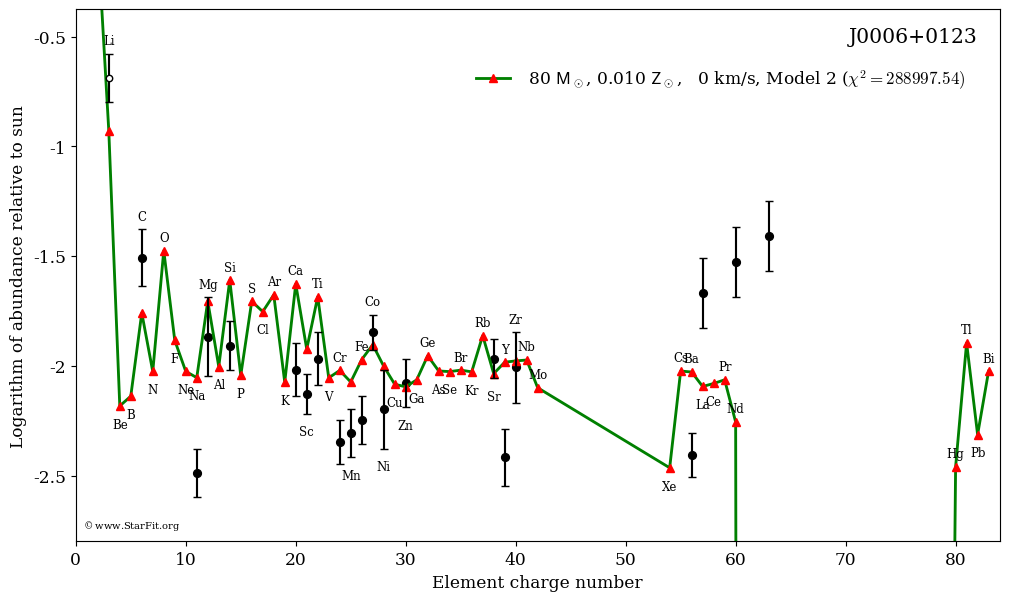

In [24]:
objname = 'J0006+0123'
starpath = stardir/('%s.dat'%(objname))
rot = Single(
    starpath, db='nuc.lc18.star.el.y.stardb.xz', 
    z_min=3, z_max=100, z_exclude=[3, 19], 
    silent=True)
rot.plot(xlim=(0, 84))

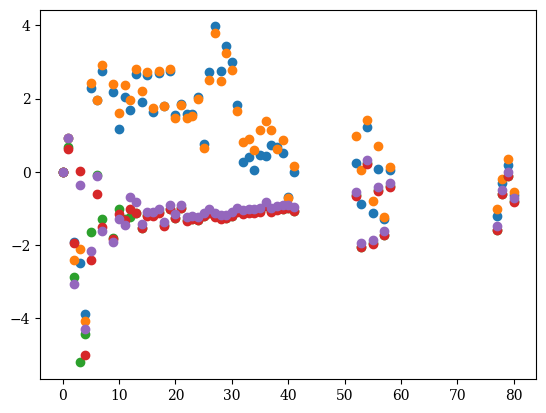

In [145]:
plt.scatter(np.arange(len(element_list)), yield_df.loc[:, '13'].values)
plt.scatter(np.arange(len(element_list)), yield_df.loc[:, '20'].values)
plt.scatter(np.arange(len(element_list)), yield_df.loc[:, '30'].values)
plt.scatter(np.arange(len(element_list)), yield_df.loc[:, '80'].values)
plt.scatter(np.arange(len(element_list)), yield_df.loc[:, '120'].values)